# Weather Australia

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
import datetime as dt


In [75]:
weather = pd.read_csv("WheterAU/weatherAUS.csv")
weather.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:title={'center':'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

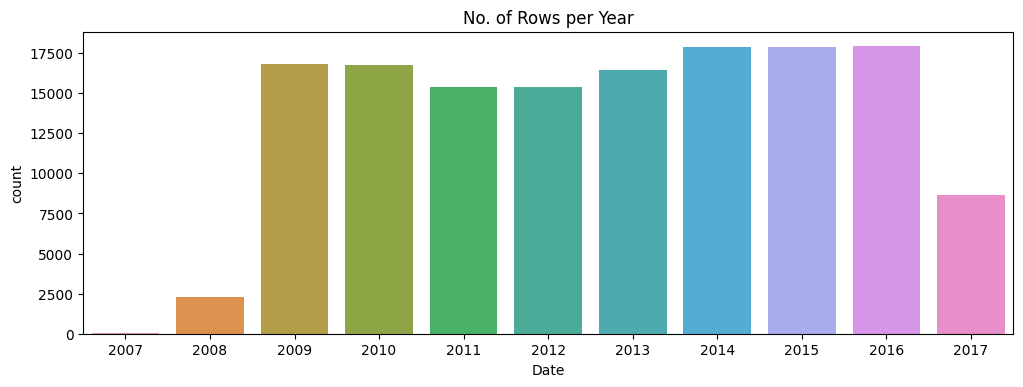

In [76]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather.Date).dt.year)

## Relationship between Sunshine and Evaporation

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

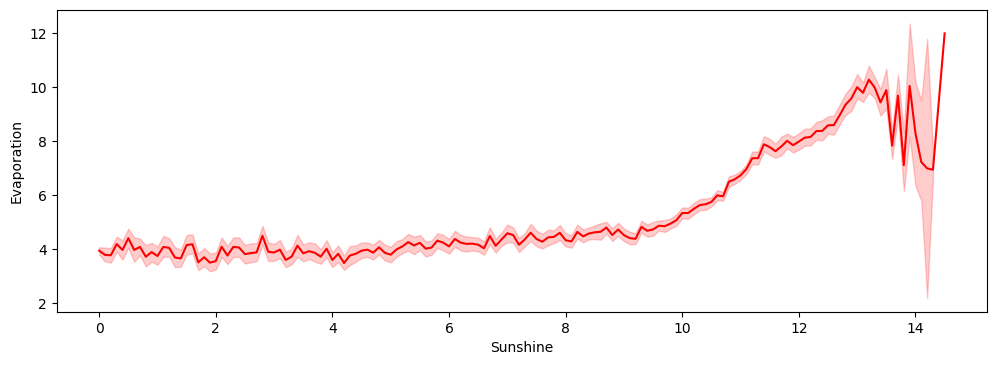

In [77]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',color='red')

## Relationship between Sunshine and Rainfall
#### When sunshine increases, rainfall decreases

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

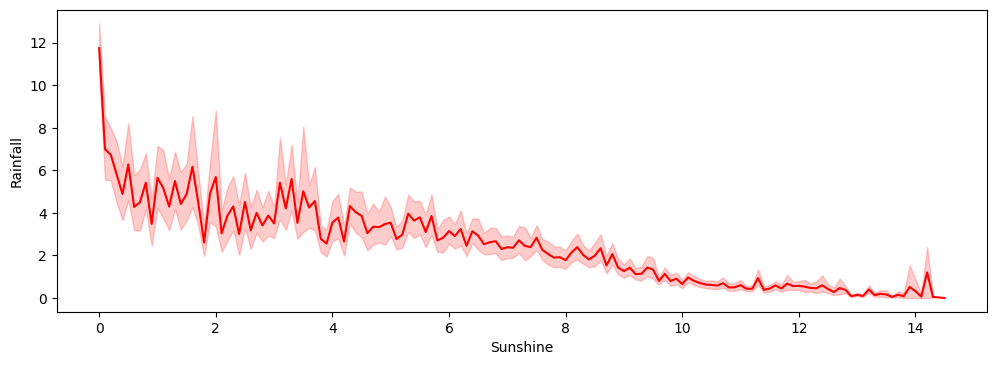

In [78]:
sns.lineplot(data=weather,x='Sunshine',y='Rainfall',color='red')

<AxesSubplot:>

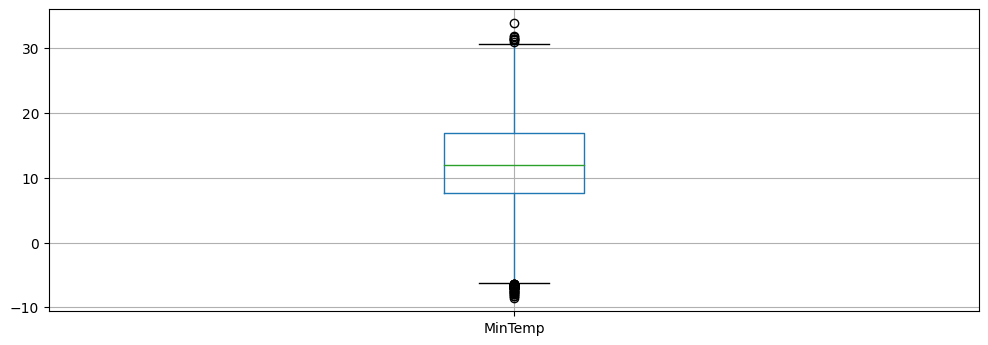

In [79]:
weather[['MinTemp']].boxplot()

In [80]:
#df_copy = weather
#drop = df_copy.drop(columns=['Date','Location','WindGustDir','WindDir9am', 'WindDir3pm', 'Cloud9am','Cloud3pm'])
#sns.pairplot(drop)
#sns.pairplot(x_vars =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             #y_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             #data = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','RainToday']],
             #hue = 'RainToday')
#plt.show()

## Relationship between Sunshine and MinTemp & MaxTemp

<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

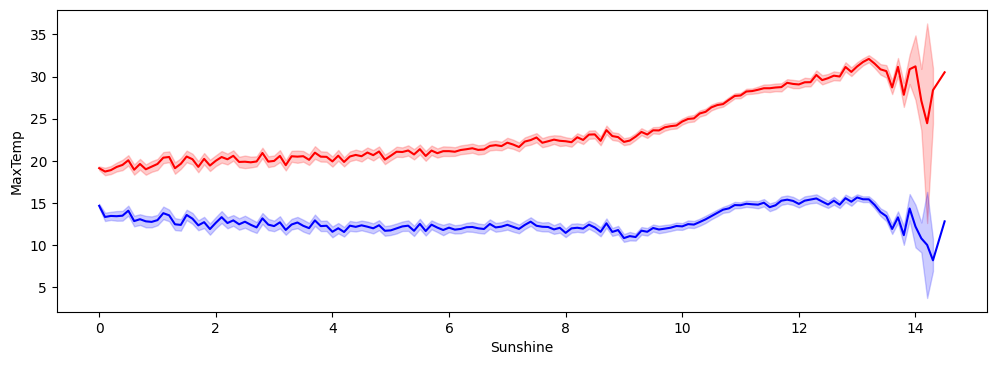

In [81]:
sns.lineplot(data=weather,x='Sunshine',y='MaxTemp',color='red')
sns.lineplot(data=weather,x='Sunshine',y='MinTemp',color='blue')

## Relationship between WindGustSpeed and Rainfall
### There is a not clear relationship between WindGustSpeed and Rainfall

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

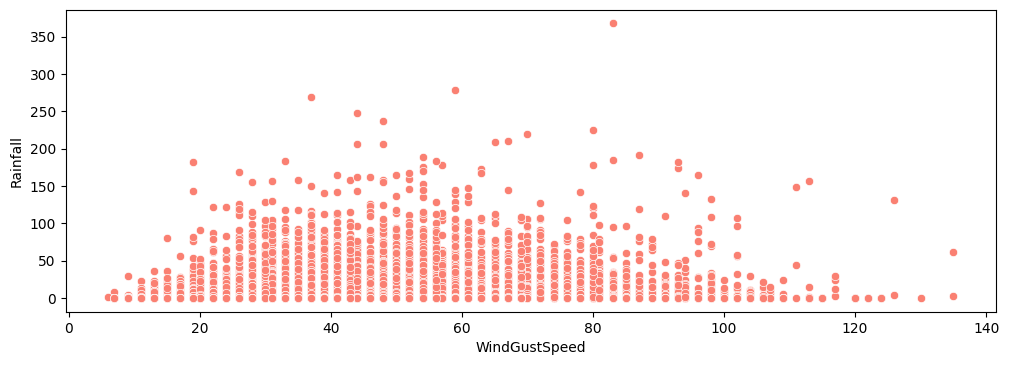

In [82]:
sns.scatterplot(data=weather,x='WindGustSpeed',y='Rainfall',color='salmon')

## Relationship between Sunshine and WindGustSpeed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Sunshine'>

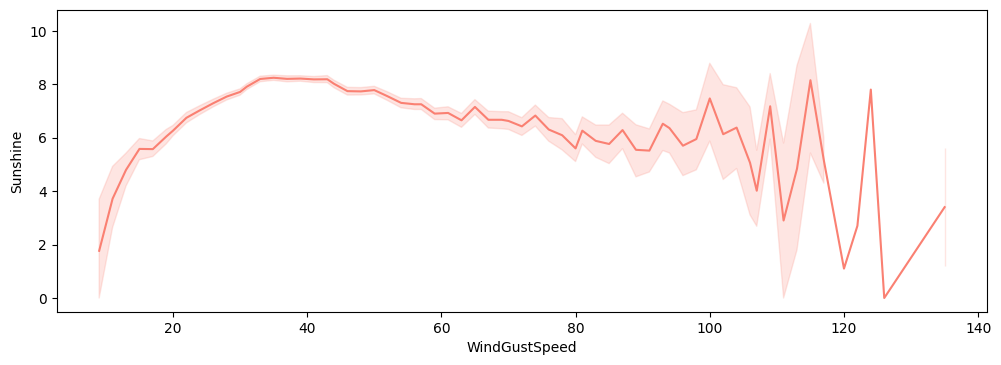

In [83]:
sns.lineplot(data=weather,x='WindGustSpeed',y='Sunshine',color='salmon')

## Country with the count of RainToday

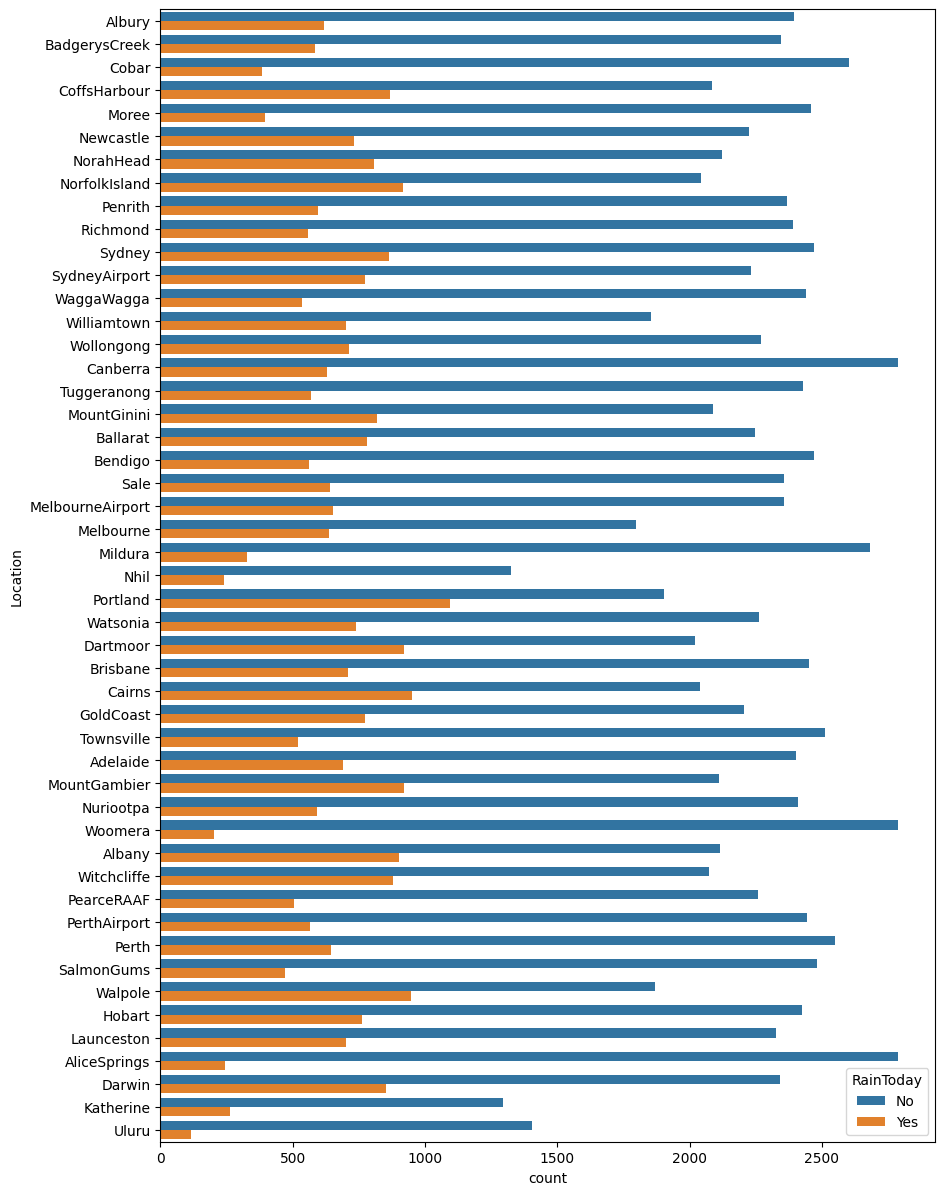

In [84]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Location',hue = 'RainToday', data = weather)
plt.show()

## TOP 20 Country with max rainfall

C:\Users\Utente\AppData\Local\Temp\ipykernel_15740\191866656.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



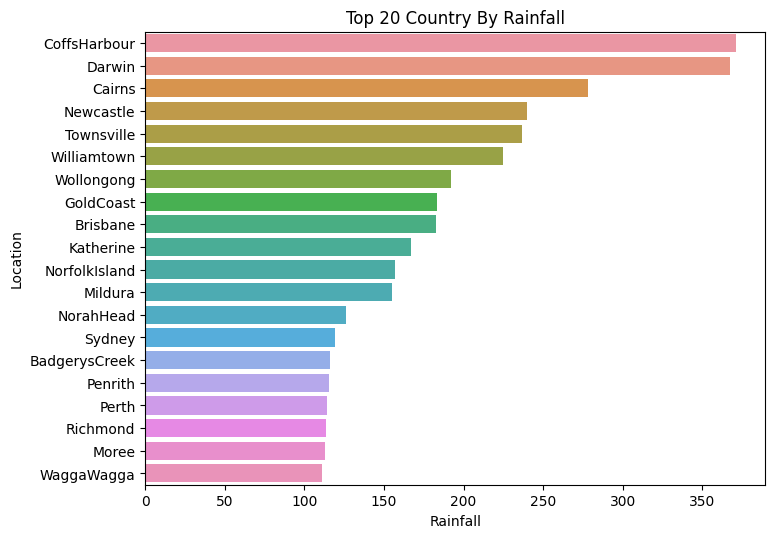

In [85]:
df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]
plt.figure(figsize=(8,6))
sns.barplot(data=df,y=df.index,x='Rainfall')
plt.title("Top 20 Country By Rainfall")
plt.show()

## Correlation between Sunshine and Evaporation hue by RainTomorrow

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

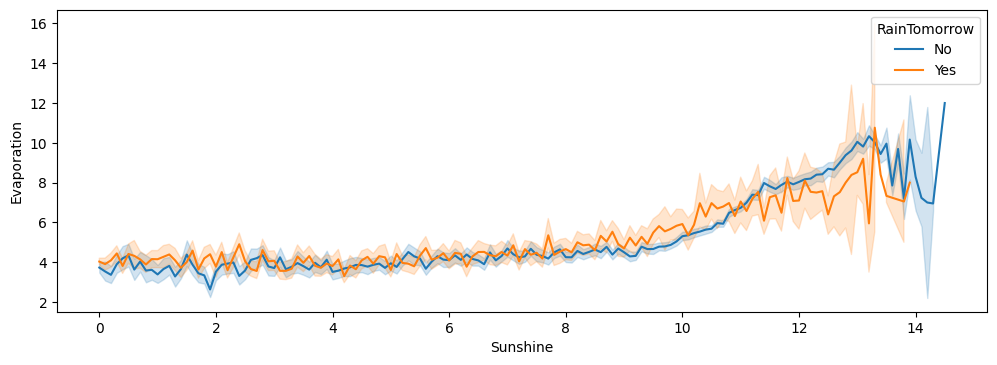

In [86]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',hue='RainTomorrow')

## Total sum of rainfall per year

In [87]:
df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')
fig = px.bar(df,y='Rainfall')
fig.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_15740\1848920830.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.



## Correlation between datas

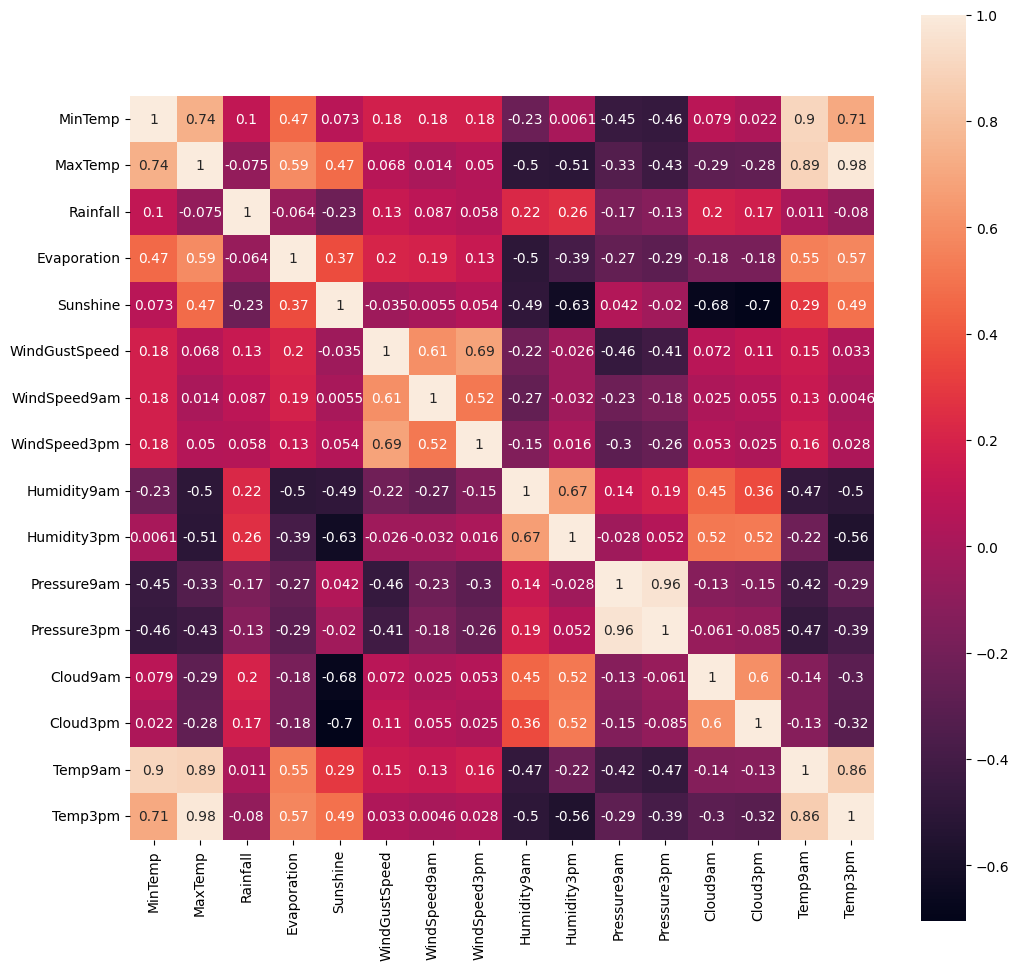

In [88]:
df2 = weather
check_data = df2.drop(columns=['Date','Location'])
plt.subplots(figsize=(12, 12))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()


## Time series analysis

In [89]:
import statsmodels
from datetime import datetime

### Time series analysis : Rainfall in Sydney 
#### In this section, we build the time series model to forecast the weather in Sydney tomorrow. Will there be rain in Sydney?

In [90]:
weather_ts = weather
weather_ts['Date']=pd.to_datetime(weather_ts['Date'])
weather_ts['day'] = weather_ts['Date'].dt.day
weather_ts['month'] = weather_ts['Date'].dt.month
weather_ts['year'] = weather_ts['Date'].dt.year
weather_ts.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [91]:
#time series analysis
sydneyweather = weather_ts[weather_ts.Location == 'Sydney']
sydneyweather = sydneyweather[['Date','Rainfall']]
sydneyweather.set_index('Date',inplace=True)
sydneyweather.head()

,Rainfall
Date,
2008-02-01,15.6
2008-02-02,6.0
2008-02-03,6.6
2008-02-04,18.8
2008-02-05,77.4


In [92]:
sydneyweather.head

<bound method NDFrame.head of             Rainfall
Date                
2008-02-01      15.6
2008-02-02       6.0
2008-02-03       6.6
2008-02-04      18.8
2008-02-05      77.4
...              ...
2017-06-21       0.0
2017-06-22       0.0
2017-06-23       0.0
2017-06-24       0.0
2017-06-25       0.0

[3344 rows x 1 columns]>

In [93]:
#sydney_rainfall_averages = sydneyweather.groupby(['month']).Rainfall.mean().reset_index()
#sydney_lowtemp_averages = sydneyweather.groupby(['month']).MinTemp.mean().reset_index()
#sydney_hightemp_averages = sydneyweather.groupby(['month']).MaxTemp.mean().reset_index()

###### Here, we should compare the data range within the dataset and the actual date range in days. In time series analysis, it is required that all periods are present. There should be a frequency in the data; here, it is in days.

In [94]:
#Date Range in Sydney Weather
print(sydneyweather.index)
print('\nUnique Dates in the Dataset: ',len(sydneyweather.index.unique()), ' Days')

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3344, freq=None)

Unique Dates in the Dataset:  3344  Days


In [95]:
#missing dates
total_data = pd.date_range(sydneyweather.index.min(), sydneyweather.index.max())
print('Total days in the date range:', len(total_data), 'Days')

Total days in the date range: 3433 Days


In [96]:
new_index = pd.date_range(sydneyweather.index.min(), sydneyweather.index.max())
print(new_index)

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', length=3433, freq='D')


###### Out of the 3433 dates, there are 3344 days present. The new index contains data from all periods; missing data is filled with the average rainfall over the years.

In [97]:
sydneyweather = sydneyweather.reindex(new_index, fill_value=sydneyweather['Rainfall'].mean())

In [98]:
sydneyweather_monthly = sydneyweather.resample('M').mean()
print("Monthly Averages:")
print(sydneyweather_monthly.head())

Monthly Averages:
            Rainfall
2008-02-29  8.910345
2008-03-31  2.045161
2008-04-30  4.886667
2008-05-31  0.096774
2008-06-30  4.240000


In [99]:
#First Differences
print("Monthly Temperature Averages, First Difference \n",sydneyweather_monthly.diff().head())

Monthly Temperature Averages, First Difference 
             Rainfall
2008-02-29       NaN
2008-03-31 -6.865184
2008-04-30  2.841505
2008-05-31 -4.789892
2008-06-30  4.143226


In [100]:
#Percentual Differences
#First Differences
print("Monthly Temperature Averages, First Difference \n",sydneyweather_monthly.pct_change().head())

Monthly Temperature Averages, First Difference 
              Rainfall
2008-02-29        NaN
2008-03-31  -0.770473
2008-04-30   1.389380
2008-05-31  -0.980196
2008-06-30  42.813333


<AxesSubplot:title={'center':'Monthly Rainfall Averages'}>

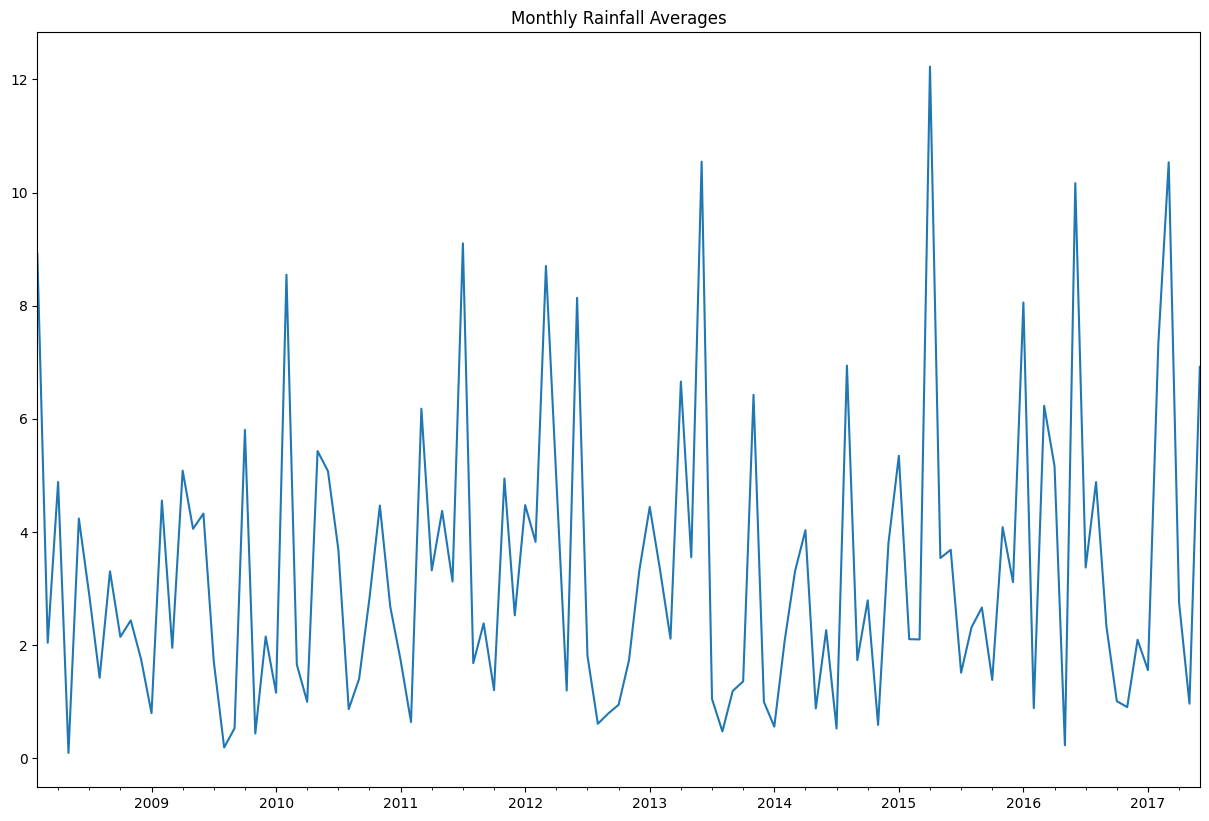

In [101]:
#plot averages
sydneyweather_monthly['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages')

<AxesSubplot:title={'center':'Monthly Rainfall Averages: First Differences'}>

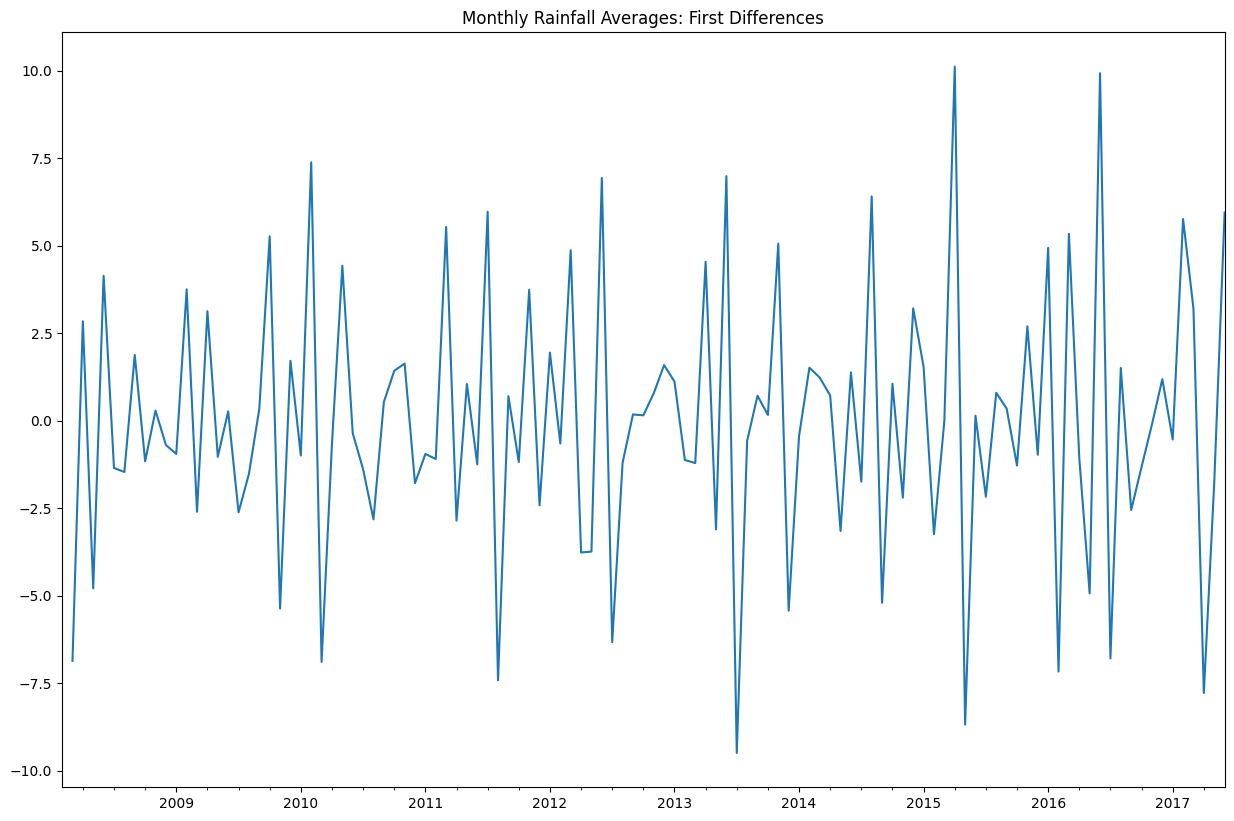

In [102]:
#First Differences Plot
sydney_fst_diff = sydneyweather_monthly.diff()
sydney_fst_diff['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages: First Differences')

<AxesSubplot:title={'center':'Monthly Rainfall Averages: Differences in %'}>

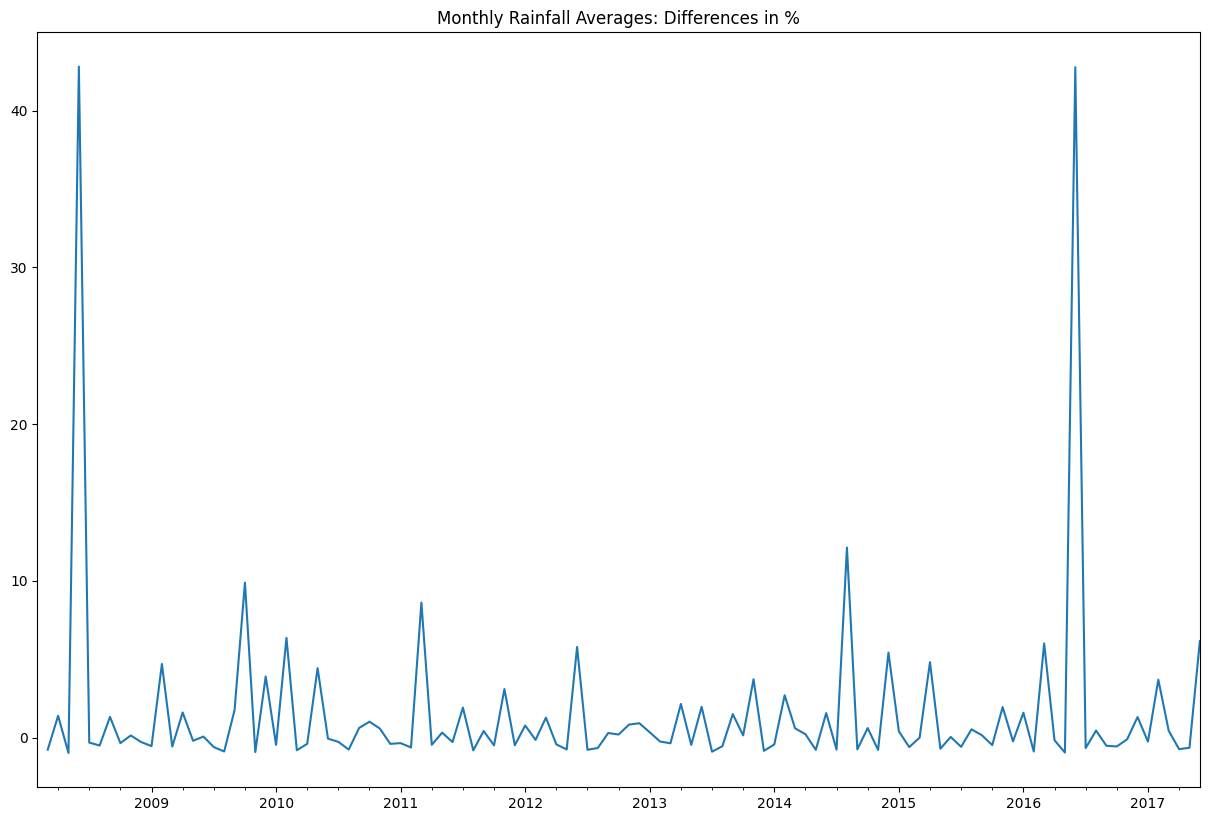

In [103]:
#Differences Plot in Percentages
sydney_percent_diff = sydneyweather_monthly.pct_change()
sydney_percent_diff['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages: Differences in %')

In [104]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(sydneyweather_monthly['Rainfall'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -11.663954
p-value: 0.000000


In [105]:
#plot time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

C:\Python310\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning:




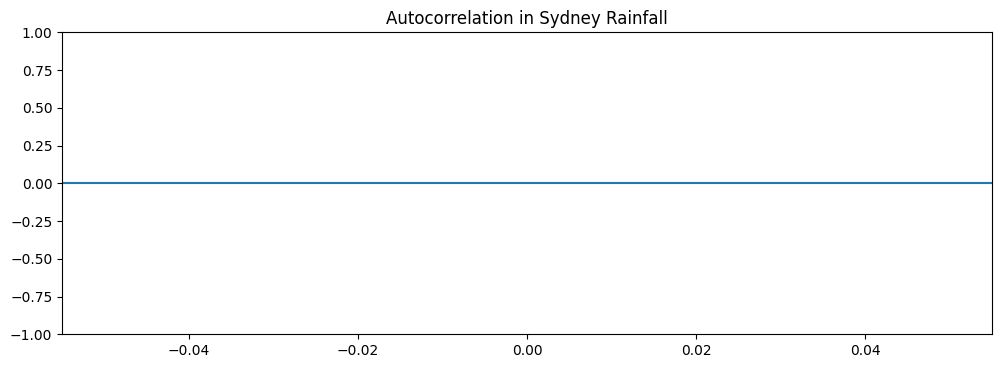

In [106]:
#autocorrelation plot
acf_plot = plot_acf(sydneyweather['Rainfall'], lags=12, title='Autocorrelation in Sydney Rainfall')

C:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



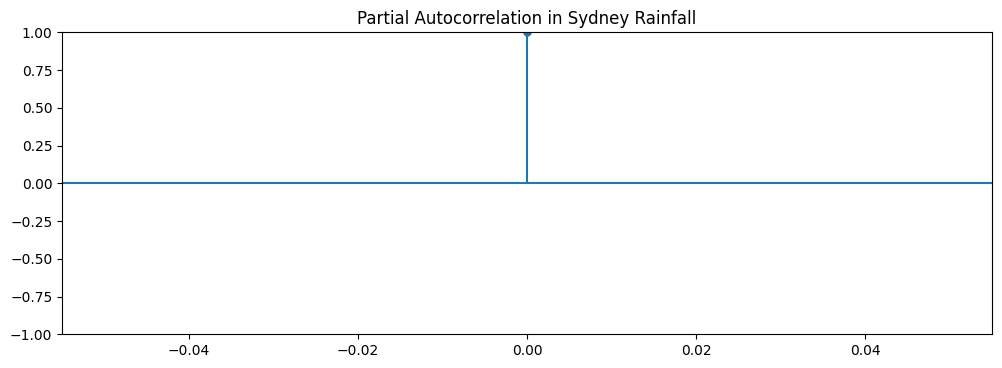

In [107]:
#autocorrelation plot
pacf_plot = plot_pacf(sydneyweather['Rainfall'], lags=12, title='Partial Autocorrelation in Sydney Rainfall')


Monthly Data Seasonal Plot


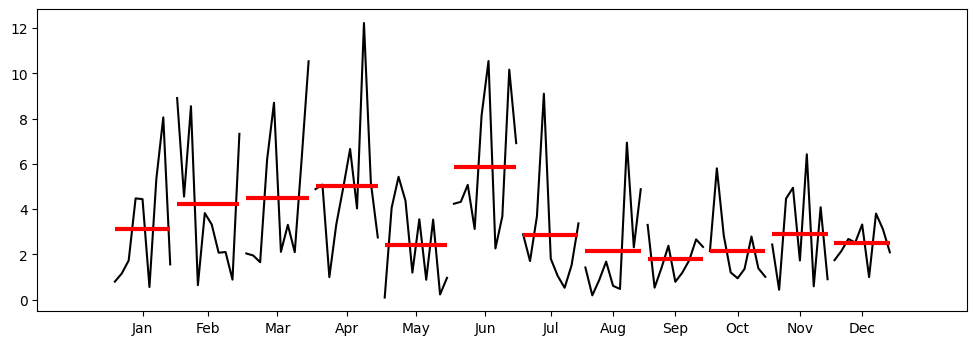

In [108]:
#seasonality plot 
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sydneyweather_monthly['Rainfall'])

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose

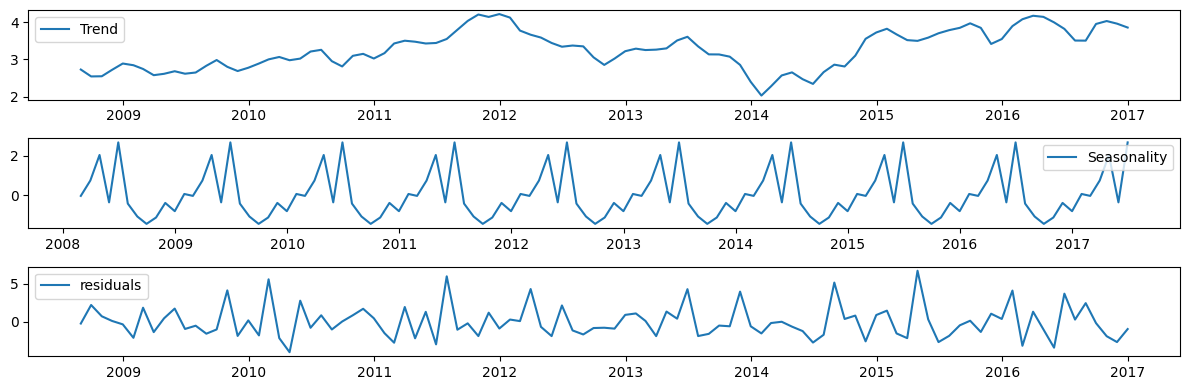

In [110]:
decomposition  = seasonal_decompose(sydneyweather_monthly)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(311)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(312)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(313)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Time series analysis: second type

In [128]:
mask = (weather['Date'] > '2008-01-1') & (weather['Date'] <= '2020-12-30') & (weather['Location'] == 'Canberra')

#var = weather_ts[weather_ts.Location == 'Sydney']
var = weather.loc[mask]
#print(var)
#var_series=var.MinTemp.dropna()
index= var.Date
var = var.set_index(index)
var_series= var['MinTemp'].dropna()
print(var_series)
#sns.lineplot(var_series)


Date
2008-01-02    14.3
2008-01-03    15.9
2008-01-04    16.7
2008-01-05    12.1
2008-01-06    14.3
              ... 
2017-06-21    -2.4
2017-06-22    -0.4
2017-06-23    -2.9
2017-06-24     0.1
2017-06-25    -4.3
Name: MinTemp, Length: 3368, dtype: float64


In [129]:
var_series2=pd.DataFrame(var_series)
var_series2['month_year'] = var_series2.index.to_period('M')
var_series2=var_series2.groupby(var_series2.month_year)['MinTemp'].mean()
#var_series2.index = var_series2.index.strftime('%Y-%m')
var_series2.index=var_series2.index.to_timestamp()
#var_series2.index = datetime.strptime(str(var_series2.index),'%Y-%m')
print(var_series2)

var_series=var_series2

month_year
2008-01-01    15.406667
2008-02-01    12.700000
2008-03-01    10.867742
2008-04-01     5.183333
2008-05-01     2.538710
                ...    
2017-02-01    12.878571
2017-03-01    12.767742
2017-04-01     5.536667
2017-05-01     1.596774
2017-06-01    -1.092000
Name: MinTemp, Length: 111, dtype: float64


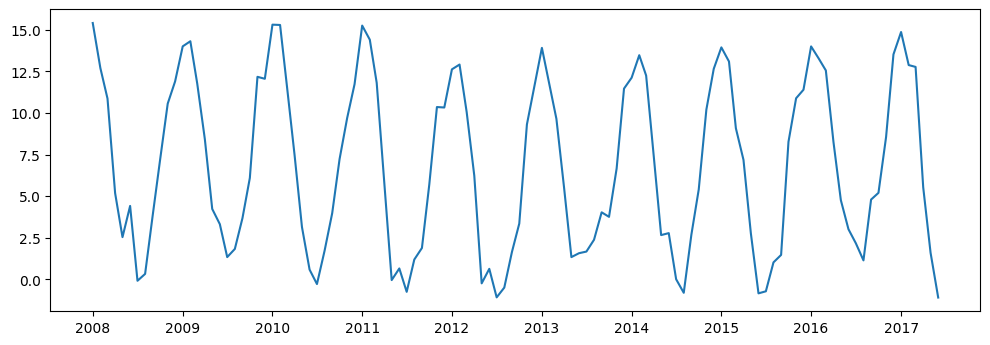

In [130]:
plt.plot(var_series)
plt.show()

##### Ho: la serie è stazionaria
##### se p-value > 0.05 la serie è non stazionaria

In [131]:
from statsmodels.tsa.stattools import adfuller
from numpy import log

result = adfuller(var_series)
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])

ADF Statistic: -2.334737
p-value: 0.161009


##### Ho: la serie è non stazionaria stazionaria
##### se p-value > 0.05 la serie è stazionaria

In [132]:
from statsmodels.tsa.stattools import kpss

In [133]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    

In [134]:

kpss_test(var_series)

Results of KPSS Test:
Test Statistic           0.04692
p-value                  0.10000
#Lags Used               5.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


C:\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




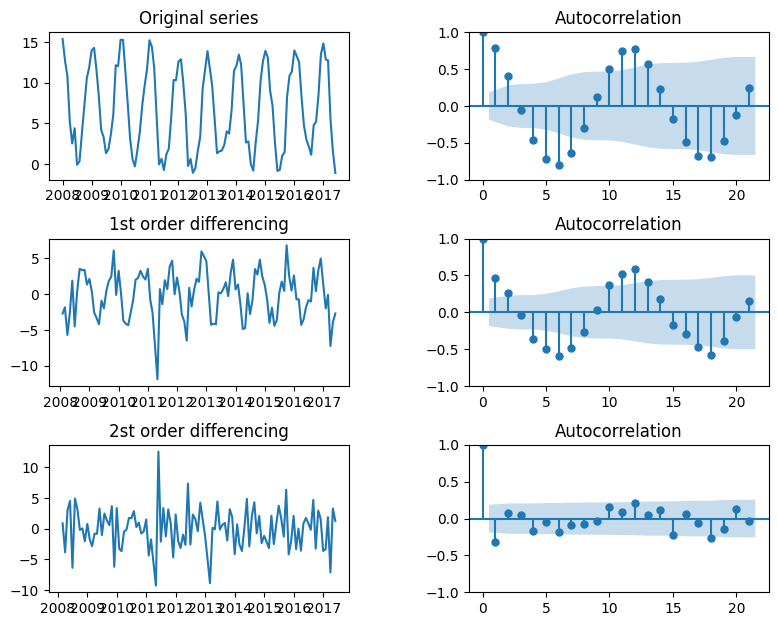

In [135]:
#Original series 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf   
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})

fig, axes = plt.subplots(3,2)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
axes[0,0].plot(var_series); 
axes[0,0].set_title('Original series')
plot_acf(var_series, ax=axes[0,1])

axes[1,0].plot(var_series.diff())
axes[1,0].set_title('1st order differencing')
plot_acf(var_series.diff().dropna(), ax=axes[1,1])

axes[2,0].plot(var_series.diff().diff())
axes[2,0].set_title('2st order differencing')
plot_acf(var_series.diff().diff().dropna(), ax=axes[2,1])

plt.show()

##### si vede che già dal primo ordine di differenza la serie raggiunge la stazionarietà, in relatà spaendo dai test che la nostra serie è stazionaria, possiamo impostare il parametro d = 0 in ARIMA

C:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



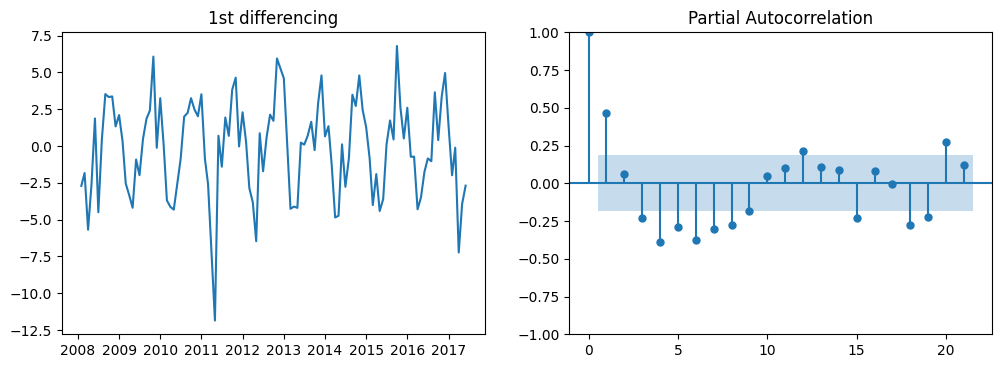

In [136]:
plt.rcParams.update({'figure.figsize':(12,4), 'figure.dpi':100})
fig, axes = plt.subplots(1,2)
plt.subplots_adjust(wspace=0.2,hspace=0.2)

axes[0].plot(var_series.diff()); 
axes[0].set_title('1st differencing')
plot_pacf(var_series.diff().dropna(), ax=axes[1])
plt.show()




C:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



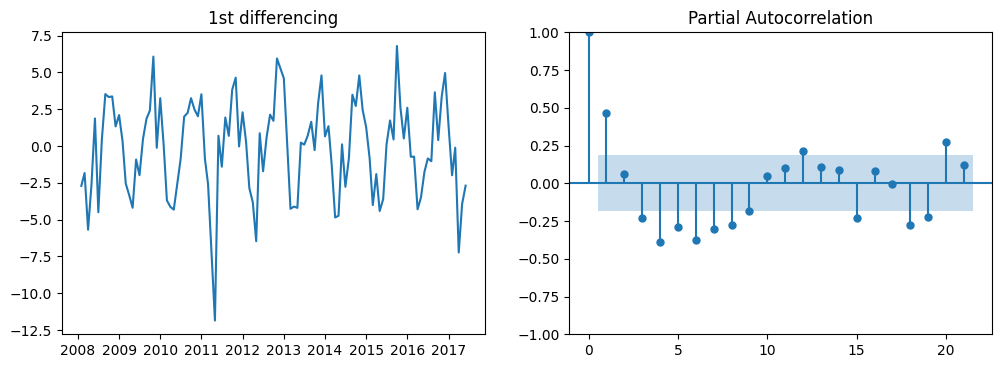

In [137]:
fig, axes = plt.subplots(1,2, sharex=False)

axes[0].plot(var_series.diff())
axes[0].set_title('1st differencing')

plot_pacf(var_series.diff().dropna(), ax=axes[1])

axes[1].set()
#xlim=(dt.datetime(2008,1,1), dt.datetime(2018,1,1))
#axes[0, 0].set_xlim(dt.datetime(2017,4,4), dt.datetime(2017,4,13))
plt.show()

In [138]:
from statsmodels.tsa.arima.model import ARIMA


In [139]:
model = ARIMA(var_series, order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                MinTemp   No. Observations:                  111
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -263.247
Date:                Tue, 05 Apr 2022   AIC                            536.494
Time:                        17:05:04   BIC                            550.041
Sample:                             0   HQIC                           541.989
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7732      1.232      5.497      0.000       4.358       9.188
ar.L1          0.6342      0.121      5.248      0.000       0.397       0.871
ma.L1          0.4824      0.119      4.056      0.0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(var_series, order=(1,0,2), seasonal_order=(1, 0, 1, 30))
model_fit = model.fit()
print(model_fit.summary())
#add metriche


C:\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



                                      SARIMAX Results                                       
Dep. Variable:                              MinTemp   No. Observations:                   18
Model:             SARIMAX(1, 0, 2)x(1, 0, [1], 30)   Log Likelihood                 -42.714
Date:                              Tue, 05 Apr 2022   AIC                             97.427
Time:                                      16:59:14   BIC                            102.769
Sample:                                  01-01-2016   HQIC                            98.164
                                       - 06-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9111      0.225      4.047      0.000       0.470       1.352
ma.L1          0.03

C:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [140]:
predict=model_fit.predict(start='2016',end='2020',dynamic=False,plot_insample=False)
plt.plot(predict)

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'

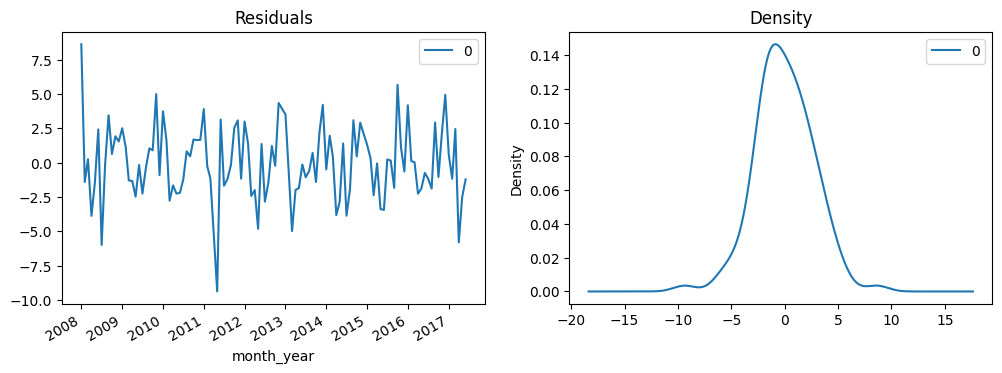

In [141]:
#Plotting residual
residuals = pd.DataFrame(model_fit.resid)
fig, axes = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=axes[0])
residuals.plot(kind='kde',title="Density",ax=axes[1])
plt.show()


In [ ]:
#import statsmodels.tsa.arima_model.ARIMAResults.plot_predict
#predict=model_fit.plot_predict(dynamic=False)
#predict=model_fit.forecast( dynamic=False)
#plt.plot(predict)

In [142]:
from statsmodels.tsa.stattools import acf

train = var_series2[:80]
test = var_series2[80:]


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



ValueError: too many values to unpack (expected 3)

In [143]:
model = ARIMA(train, order=(2,0,2))
fitted = model.fit()
print(model.summary())


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [145]:
fc, se, conf=fitted.forecast(3, alpha=0.05)


C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [146]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:,0], index=test.index)
upper_series = pd.Series(conf[:,1], index=test.index)

TypeError: 'float' object is not subscriptable

In [147]:
model = ARIMA(train, order=(3,0,2))
fitted = model.fit()
print(fitted.summary())

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                MinTemp   No. Observations:                   80
Model:                 ARIMA(3, 0, 2)   Log Likelihood                -174.483
Date:                Tue, 05 Apr 2022   AIC                            362.965
Time:                        17:08:43   BIC                            379.640
Sample:                             0   HQIC                           369.650
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6062      0.343     19.243      0.000       5.933       7.279
ar.L1          0.6395      0.261      2.450      0.014       0.128       1.151
ar.L2          0.7292      0.420      1.734      0.0

C:\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



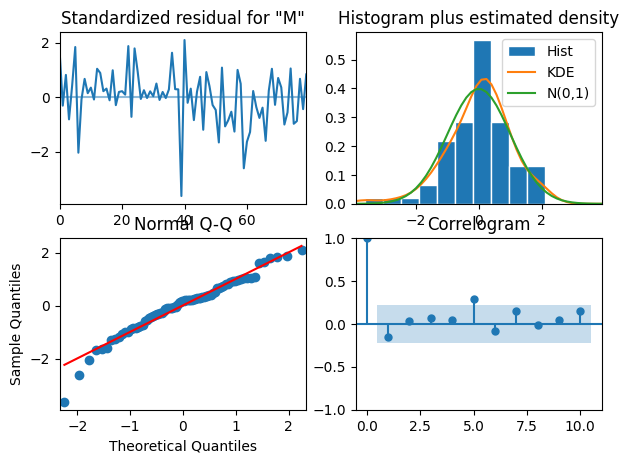

In [148]:
fitted.plot_diagnostics(figsize=(7,5))
plt.show()